In [1]:
import pandas as pd
import numpy as np
import glob, pyedflib, re, os
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = '/data/eeg'
CHANNELS = np.array(['A1-RF', 'A2-RF', 'C3-RF', 'C4-RF', 'Cz-RF', 'F3-RF',
                     'F4-RF', 'F7-RF', 'F8-RF', 'Fp1-RF', 'Fp2-RF', 'Fz-RF',
                     'O1-RF', 'O2-RF', 'P3-RF', 'P4-RF', 'Pz-RF', 'T3-RF',
                     'T4-RF', 'T5-RF', 'T6-RF'])

## Load data

In [3]:
for f in glob.iglob(f'{DATA_DIR}/**/*.edf', recursive=True):
    try:
        
        basename = os.path.splitext(f)[0]
        print(basename)
        
        # Load file
        r = pyedflib.EdfReader(f, check_file_size = 1)

        # Initial dimensions
        d = r.signals_in_file
        n = r.getNSamples()[0]
        
        # Load initial labels and data
        labels = np.array(r.getSignalLabels())
        data = np.zeros((d + 1, n)) # +1 dimension for dummy
        for i in np.arange(d): data[i, :] = r.readSignal(i)

        # Rearrange channel order
        order = np.zeros((len(CHANNELS))).astype(int)
        for i, ch in enumerate(CHANNELS):
            if ch in labels:
                order[i] = np.where(labels == ch)[0]
            else:
                order[i] = d

        # Reshape data, fix dimensions
        data = data[order]
        d = len(order)
        
        peaks = np.zeros((d, n)).astype(int)
        
        # Loading peaks
        for filename in (f'{basename}.txt', f'{basename}.edf_POS.txt'):
            if os.path.isfile(filename):
                
                with open(filename, 'r') as p:
                    lines = p.readlines()
                for line in lines:
                    line = re.sub('\n','', line)
                    line = re.sub(';$','', line)
                    items = line.split(";")
                    if len(items) > 1:
                        key = items[0]
                        if key in CHANNELS:
                            j = np.where(CHANNELS == key)[0]
                            val = np.array(items[1:]).astype(float).astype(int)
                            peaks[j, val] = 1

        # Print image
        plt.rcParams['figure.figsize'] = (17, 17)
        x = list(range(n))
        for i in range(d):
            ax = plt.subplot(d, 1, i + 1)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            if i < d - 1:
                ax.spines['bottom'].set_visible(False)
            ax.plot(x, data[i,:])
            plt.ylabel(CHANNELS[i])
            plt.xlim((0,n))
            for x1 in np.where(peaks[i,:] == 1)[0]:
                ax.axvline(x = x1, color='r', linestyle='--', linewidth = 0.5)
        
        plt.savefig(f'{basename}.png')
        np.save(f'{basename}.npy', (data,peaks))

        plt.close()
        
    except Exception as e:
        print(f, ' :', e)
        raise e

/data/eeg/4_P3
read -1, less than 48640 requested!!!
read -1, less than 48640 requested!!!
/data/eeg/1_T4
read -1, less than 47360 requested!!!
read -1, less than 47360 requested!!!
/data/eeg/3_P4
read -1, less than 66560 requested!!!
read -1, less than 66560 requested!!!
/data/eeg/5_T4
read -1, less than 93440 requested!!!
read -1, less than 93440 requested!!!
read -1, less than 93440 requested!!!
/data/eeg/2_T3_2
read -1, less than 185600 requested!!!
read -1, less than 185600 requested!!!
read -1, less than 185600 requested!!!
read -1, less than 185600 requested!!!
read -1, less than 185600 requested!!!
read -1, less than 185600 requested!!!
/data/eeg/6_T3
read -1, less than 57600 requested!!!
read -1, less than 57600 requested!!!
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/sus 2016.06.27RE
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/zvi RE 2018.04.25 Pz Cz
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_

## Step-by-step

In [26]:
f = '/data/eeg/6_T3.edf'

In [27]:
r = pyedflib.EdfReader(f, check_file_size = 1)

In [28]:
d = r.signals_in_file
n = r.getNSamples()[0]

labels = np.array(r.getSignalLabels())
data = np.zeros((d + 1, n))

for i in np.arange(d):
    data[i, :] = r.readSignal(i)
    
order = np.zeros((len(CHANNELS))).astype(int)
for i, ch in enumerate(CHANNELS):
    if ch in labels:
        order[i] = np.where(labels == ch)[0]
    else:
        order[i] = d
    
data = data[order]
d = len(order)
data.shape

read -1, less than 57600 requested!!!
read -1, less than 57600 requested!!!


(21, 57600)

In [29]:
basename = os.path.splitext(f)[0]
for filename in (f'{basename}.txt', f'{basename}.edf_POS.txt'):
    if os.path.isfile(filename):
        break
filename

'/data/eeg/6_T3.txt'

In [30]:
peaks = np.zeros((d, n)).astype(int)
with open(filename, 'r') as p:
    lines = p.readlines()
for line in lines:
    line = re.sub('\n','', line)
    line = re.sub(';$','', line)
    items = line.split(";")
    if len(items) > 1:
        key = items[0]
        if key in CHANNELS:
            j = np.where(CHANNELS == key)[0]
            val = np.array(items[1:]).astype(float).astype(int)
            peaks[j, val] = 1
np.unique(peaks, return_counts = True)

(array([0, 1]), array([1209485,     115]))

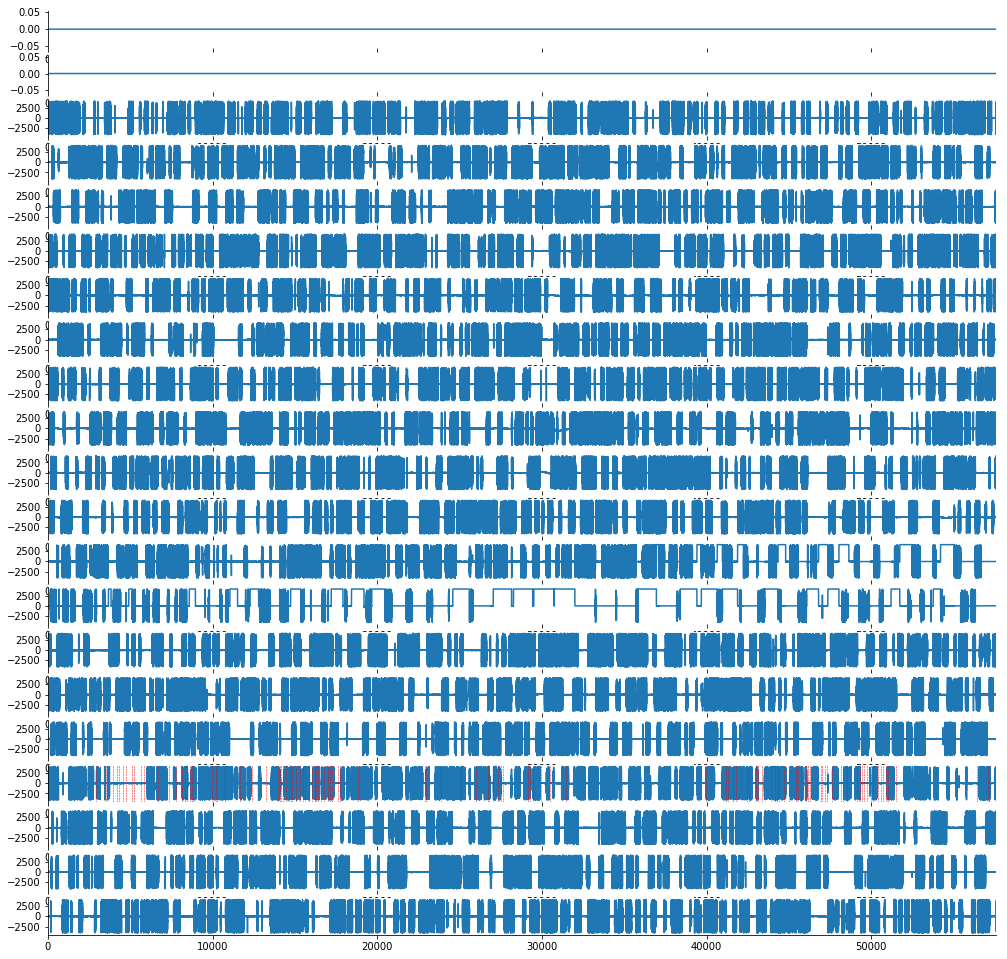

In [31]:
plt.rcParams['figure.figsize'] = (17, 17)
x = list(range(n))
for i in range(d):
    ax = plt.subplot(d, 1, i + 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if i < d - 1:
        ax.spines['bottom'].set_visible(False)
    ax.plot(x, data[i,:])
    plt.xlim((0,n))
    for x1 in np.where(peaks[i,:] == 1)[0]:
        ax.axvline(x = x1, color='r', linestyle='--', linewidth = 0.5)
plt.show()

In [ ]:
np.save(f'{basename}.npy', (data,peaks))

In [ ]:
data, peaks = np.load(f'{basename}.npy')